In [2]:
import pandas as pd
import numpy as np

In [ ]:
!pip install -U matplotlib

In [4]:
import matplotlib.pyplot as plt

### Calculating VWAPS

In [6]:
path = "/media/ege/DATA/bamboo-master/Resampled_Data/20220422/SSE_600159.csv"
df = pd.read_csv(path)
df.dropna()
df.trade_size = df.trade_size.abs()
df.head()

,ts,ltp,trade_size,level_qty:ask:0,level_qty:bid:0,level_price:ask:0
0,2022-04-22 01:30:00,3.134583,3972.916667,11220.833333,58918.750000,3.147083
1,2022-04-22 01:31:00,3.140385,3942.307692,29819.230769,32473.076923,3.148462
2,2022-04-22 01:32:00,3.130278,6788.888889,18483.333333,77230.555556,3.136667
3,2022-04-22 01:33:00,3.115135,1567.567568,12740.540541,77243.243243,3.121081
4,2022-04-22 01:34:00,3.145278,6855.555556,15022.222222,47822.222222,3.152778


In [7]:
def vwap(df):
    s_i = df.trade_size.values              
    p_i = df.ltp.values
    return df.assign(vwap=(p_i * s_i).cumsum() / s_i.cumsum())
df_vw = vwap(df)
df_vw.head()

,ts,ltp,trade_size,level_qty:ask:0,level_qty:bid:0,level_price:ask:0,vwap
0,2022-04-22 01:30:00,3.134583,3972.916667,11220.833333,58918.750000,3.147083,3.134583
1,2022-04-22 01:31:00,3.140385,3942.307692,29819.230769,32473.076923,3.148462,3.137473
2,2022-04-22 01:32:00,3.130278,6788.888889,18483.333333,77230.555556,3.136667,3.134151
3,2022-04-22 01:33:00,3.115135,1567.567568,12740.540541,77243.243243,3.121081,3.132319
4,2022-04-22 01:34:00,3.145278,6855.555556,15022.222222,47822.222222,3.152778,3.136160


### Calculating Returns

In [9]:
minly_returns = df_vw['ltp'].pct_change()
minly_returns

0           NaN
1      0.001851
2     -0.003218
3     -0.004837
4      0.009676
         ...   
321    0.000641
322   -0.000584
323    0.001315
324    0.001033
325    0.002533
Name: ltp, Length: 326, dtype: float64

In [10]:
len(df_vw['ltp'])

326

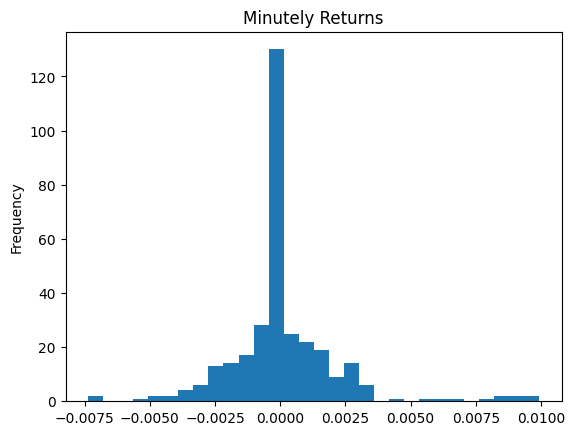

In [18]:
fig = plt.figure()
minly_returns.plot.hist(bins = 30)
plt.title("Minutely Returns")
plt.show()

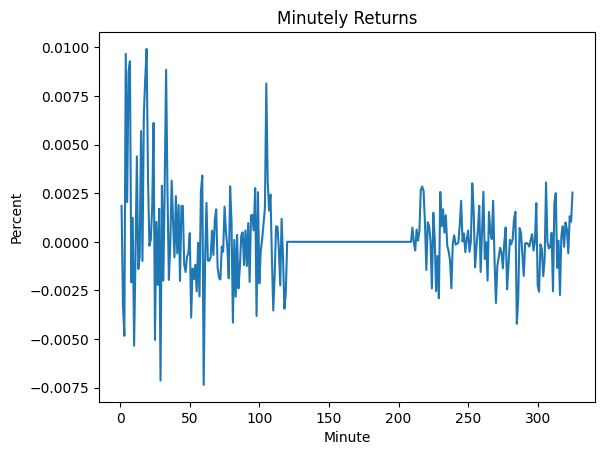

In [31]:
plt.plot(minly_returns)
plt.title("Minutely Returns")
plt.xlabel("Minute")
plt.ylabel("Percent")
plt.show()

### tsmoothie

In [ ]:
!pip install tsmoothie

#### LOWESS Smoothing
LOWESS is a powerful non-parametric technique for fitting a smoothed line for given data either through univariate or multivariate smoothing. It implements a regression on a collection of points in a moving range, and weighted according to distance, around abscissa values in order to calculate ordinal values. The selection of the smoothing parameter (alpha) is often entirely based on a “repeated trial” basis. There is no specific technique for the selection of its exact value. The selection of a particular value may lead to “over-smoothing” or “under-smoothing”.

### Note: I will look into other smoothing techniques

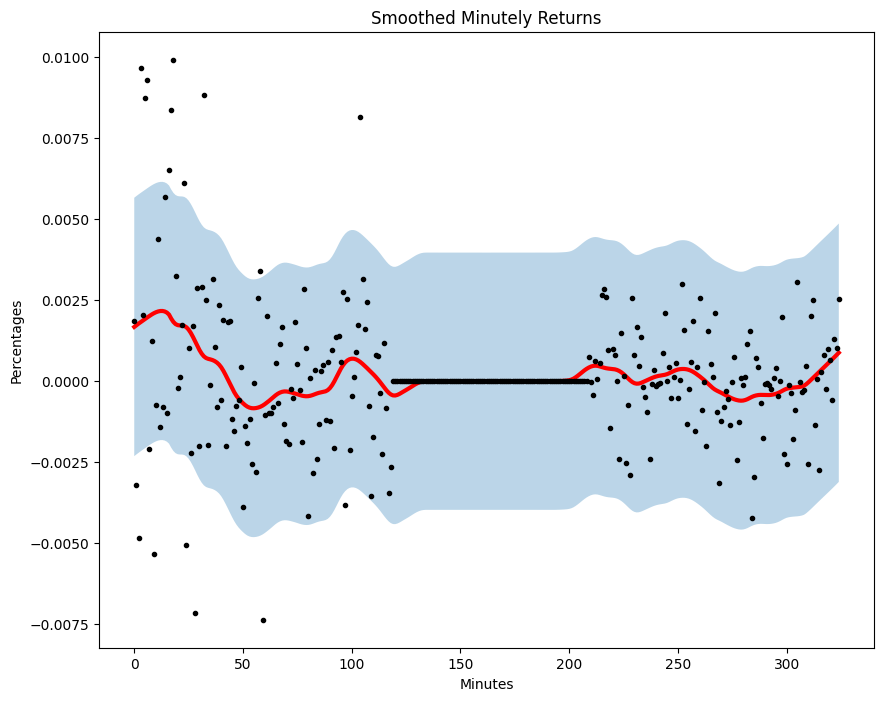

In [46]:
from tsmoothie.smoother import LowessSmoother

# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(minly_returns.drop(0))

#generate intervals
low, up = smoother.get_intervals('prediction_interval')

plt.figure(figsize=(10,8))
plt.plot(smoother.smooth_data[0], linewidth=3, color='red')
plt.plot(smoother.data[0], '.k')
plt.title("Smoothed Minutely Returns"); plt.xlabel('Minutes')
plt.ylabel("Percentages")
plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)